#### **TASK-5:CREDIT CARD FRAUD DETECTION**

Import the neccesary libraries


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve

Load the dataset

In [8]:
# Load the dataset
file_path = 'creditcard.csv'
df = pd.read_csv(file_path)

# Display the first few rows and the structure of the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(None,
    Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V2

Visualization:


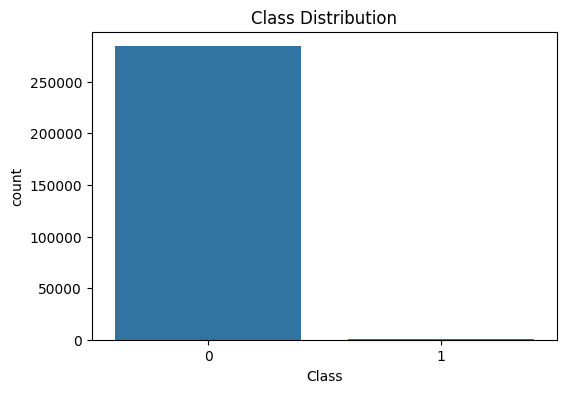

In [9]:
# Visualize Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

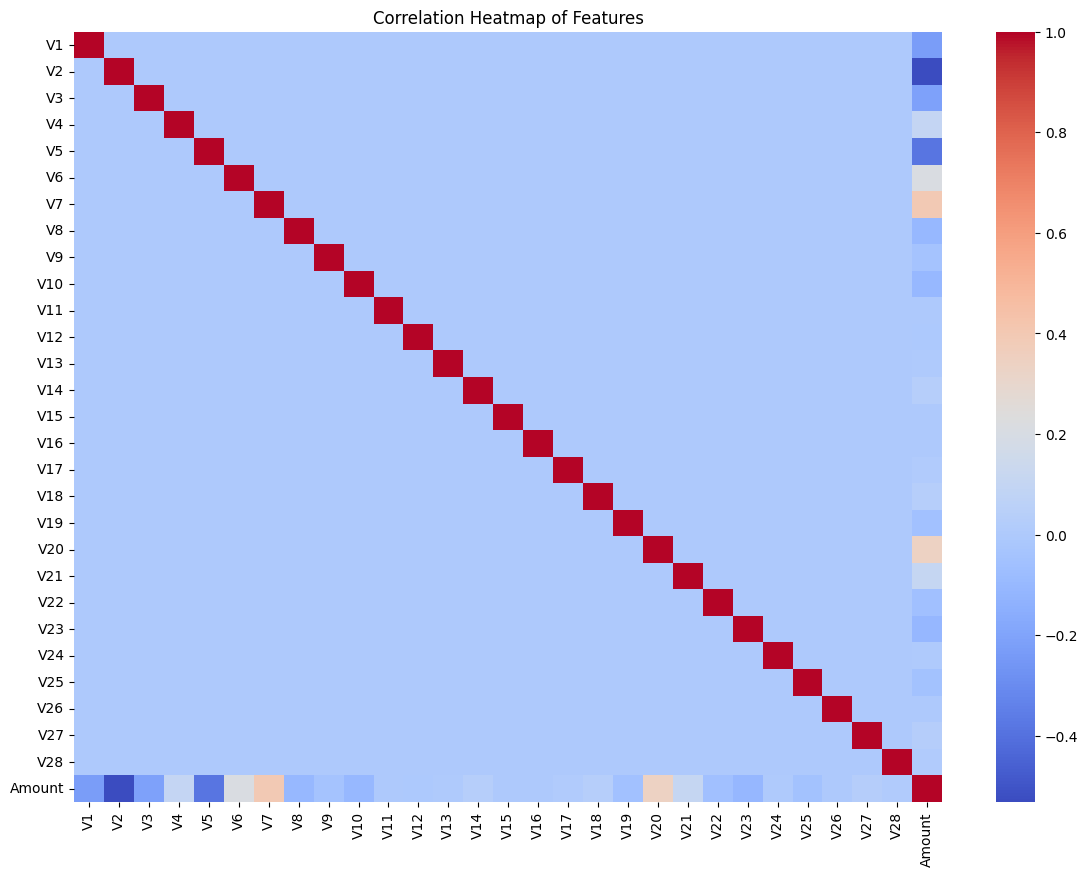

In [10]:
# Correlation Heatmap (for V columns and Amount)
plt.figure(figsize=(14, 10))
sns.heatmap(df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']].corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

**Preprocessing:** Handle missing values, normalize the `Amount` and `Time` columns.

In [11]:
# Preprocessing: Normalize 'Amount' and 'Time' columns
scaler = StandardScaler()
df['Amount_Norm'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time_Norm'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original 'Amount' and 'Time' columns
df = df.drop(['Amount', 'Time'], axis=1)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Norm,Time_Norm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**Class Imbalance Handling:** Address the imbalance using oversampling (SMOTE) or undersampling and
train Logistic Regression and Random Forest Models


In [18]:
# Split dataset into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Handle class imbalance using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Evaluating Model Performance


In [19]:
# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate model performance
logreg_report = classification_report(y_test, y_pred_logreg)
rf_report = classification_report(y_test, y_pred_rf)


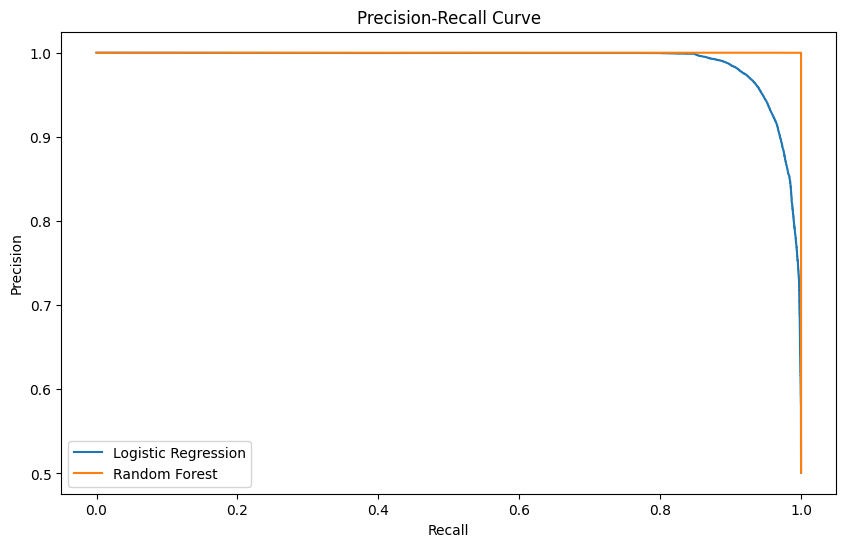

('              precision    recall  f1-score   support\n\n           0       0.93      0.98      0.95     85149\n           1       0.97      0.92      0.95     85440\n\n    accuracy                           0.95    170589\n   macro avg       0.95      0.95      0.95    170589\nweighted avg       0.95      0.95      0.95    170589\n',
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     85149\n           1       1.00      1.00      1.00     85440\n\n    accuracy                           1.00    170589\n   macro avg       1.00      1.00      1.00    170589\nweighted avg       1.00      1.00      1.00    170589\n')

In [20]:
# Plot Precision-Recall Curve
y_scores_logreg = logreg.predict_proba(X_test)[:, 1]
y_scores_rf = rf.predict_proba(X_test)[:, 1]

precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_scores_logreg)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)

plt.figure(figsize=(10, 6))
plt.plot(recall_logreg, precision_logreg, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Show classification reports
logreg_report, rf_report
